# Hazard:RiverFlood

A river flood hazard is generated by the class Riverflood() that extracts flood data simulated within the Inter-Sectoral Impact Model Intercomparison Project (ISIMIP).
The method set_from_nc() generates a data set with flood depth in m and the flooded fraction in each centroid. The corresponding flooded area in each centroid, annually or per event can be calculated with the function set_flooded_area().

Besides, all other general Hazard Attributes, the class RiverFlood() has more Attributes related to the flooded area:

- fla_ann_av      (float) average flooded area per year
- fla_ev_av       (float) average flooded area per event
- fla_event       (1d array(n_events)) total flooded area for every event
- fla_annual      (1d array (n_years)) total flooded area for every year

Only set if save_centr = True in set_flooded_area():
- fla_ev_centr    (2d array(n_events x n_centroids)) flooded area in every centroid for every event
- fla_ann_centr   (2d array(n_years x n_centroids)) flooded area in every centroid for every year
     
       

## Generating a RiverFlood Hazard

A Riverflood is generated with the method set_from_nc(). There are different options for choosing centroids.
You can set centroids for:
- countries
- regions
- global hazards
- with any kind of coordinates (points)

Countries or regions can either be set with corresponding ISIMIPNatID centroids or with Natural Earth Multipolygons using the keyword 'ISINatIDGrid'
It is obligatory to set paths for flood depth and flood fraction


### Setting floods for countries with Natural Earth Multipolygons:

In [1]:
import sys
sys.path.append('/home/insauer/Climada/climada_python')
import numpy as np
import matplotlib.pyplot as plt
from climada.hazard.river_flood import RiverFlood
from climada.hazard.centroids import Centroids
from climada.util.constants import HAZ_DEMO_FLDDPH, HAZ_DEMO_FLDFRC


years = [2000]
# generating RiverFlood hazard from netCDF file
# uses centroids from Natural Earth Multipolygon 
rf = RiverFlood()
rf.set_from_nc(countries = ['DEU','AUT','CHE'], years=years, dph_path=HAZ_DEMO_FLDDPH, frc_path=HAZ_DEMO_FLDFRC)
rf.event_name

2020-02-26 12:27:06,170 - climada - DEBUG - Loading default config file: /home/insauer/Climada/climada_python/climada/conf/defaults.conf
2020-02-26 12:27:08,743 - climada.util.coordinates - INFO - Reading /home/insauer/Climada/climada_python/data/demo/flddph_WaterGAP2_miroc5_historical_flopros_gev_picontrol_2000_0.1.nc
2020-02-26 12:27:08,789 - climada.util.coordinates - INFO - Reading /home/insauer/Climada/climada_python/data/demo/fldfrc_WaterGAP2_miroc5_historical_flopros_gev_picontrol_2000_0.1.nc
stop


['2000']

In [5]:
# plot centroids:
rf.centroids.plot()
# get resolution
print('resolution:')
rf.centroids.meta['transform'][0]

NameError: name 'rf' is not defined

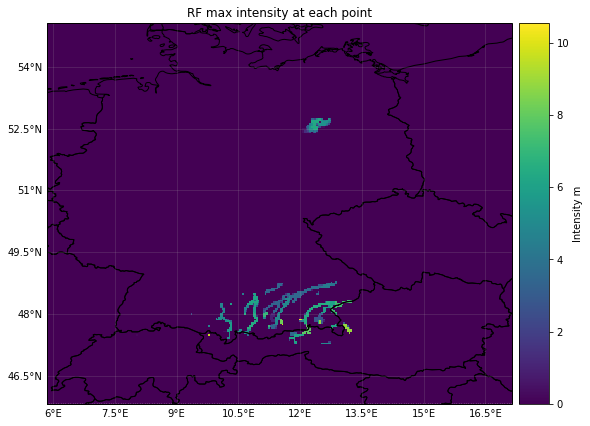

In [3]:
# plotting intensity (Flood depth in m)
rf.plot_intensity(event=0, smooth = False)

### Setting flood with ISIMIP Grid:

2019-09-13 10:11:46,268 - climada.hazard.centroids.centr - DEBUG - Resolution points: 0.04166659999998501
2019-09-13 10:11:46,268 - climada.util.coordinates - INFO - Reading /home/insauer/Climada/climada_python/data/demo/flddph_WaterGAP2_miroc5_historical_flopros_gev_picontrol_2000_0.1.nc
2019-09-13 10:11:46,271 - climada.util.coordinates - DEBUG - Reprojecting ...
2019-09-13 10:11:46,846 - climada.util.coordinates - INFO - Reading /home/insauer/Climada/climada_python/data/demo/fldfrc_WaterGAP2_miroc5_historical_flopros_gev_picontrol_2000_0.1.nc
2019-09-13 10:11:46,850 - climada.util.coordinates - DEBUG - Reprojecting ...


/home/insauer/anaconda3/envs/climada_env/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


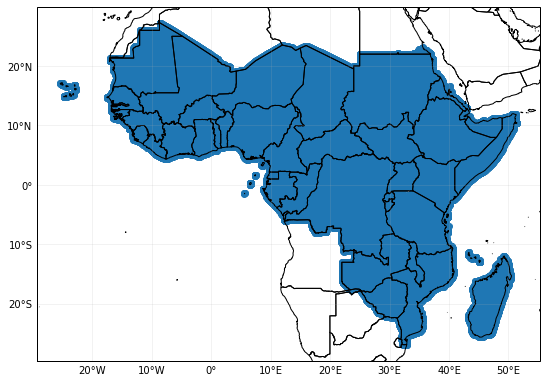

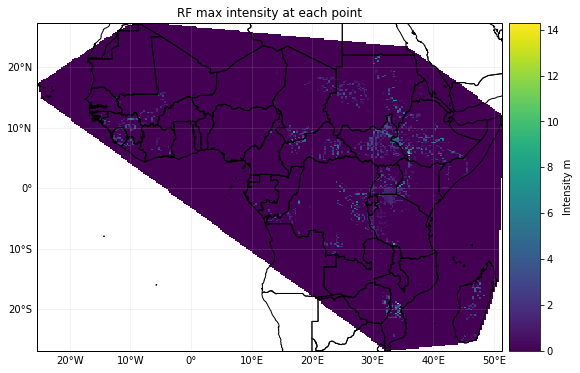

In [4]:
# generating RiverFlood hazard from netCDF file, using the ISIMIP NatID Grid with a resolution of 150as (aprox 5km)
# setting centroids for a region
rf_SSA = RiverFlood()
rf_SSA.set_from_nc(reg = ['SSA'], years=years, dph_path=HAZ_DEMO_FLDDPH, frc_path=HAZ_DEMO_FLDFRC, ISINatIDGrid=True)
rf_SSA.centroids.plot()
rf_SSA.plot_intensity(event=0, smooth = False)

### Setting flood with points as coordinates:

2019-09-13 10:12:22,712 - climada.util.coordinates - INFO - Reading /home/insauer/Climada/climada_python/data/demo/fldfrc_WaterGAP2_miroc5_historical_flopros_gev_picontrol_2000_0.1.nc
2019-09-13 10:12:23,370 - climada.util.coordinates - INFO - Reading /home/insauer/Climada/climada_python/data/demo/flddph_WaterGAP2_miroc5_historical_flopros_gev_picontrol_2000_0.1.nc


/home/insauer/anaconda3/envs/climada_env/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


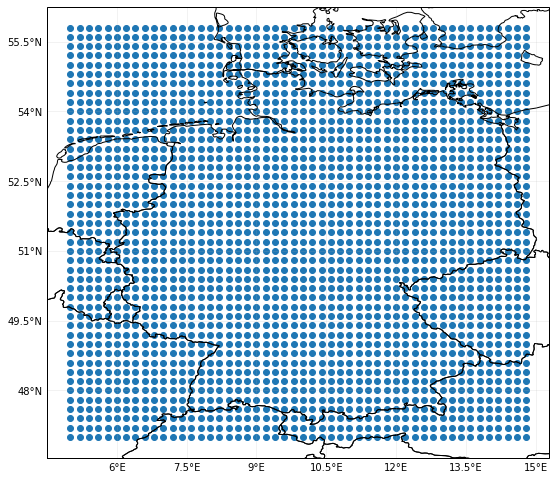

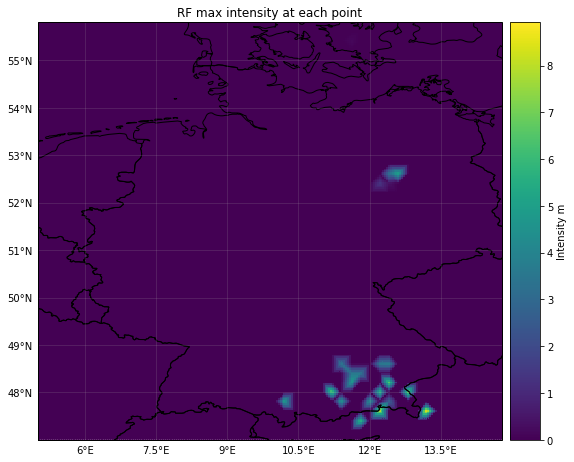

In [5]:
rand_centroids = Centroids()
lat = np.arange(47, 56, 0.2)
lon = np.arange(5, 15, 0.2)
lon, lat = np.meshgrid(lon, lat)
rand_centroids.set_lat_lon(lat.flatten(), lon.flatten())
rf_rand = RiverFlood()
rf_rand.set_from_nc(dph_path=HAZ_DEMO_FLDDPH, frc_path=HAZ_DEMO_FLDFRC,
                    centroids=rand_centroids, ISINatIDGrid=False)
rf_rand.centroids.plot()
rf_rand.plot_intensity(event = 0)


2019-09-13 10:12:30,634 - climada.util.coordinates - INFO - Reading /home/insauer/Climada/climada_python/data/demo/fldfrc_WaterGAP2_miroc5_historical_flopros_gev_picontrol_2000_0.1.nc
2019-09-13 10:12:31,282 - climada.util.coordinates - INFO - Reading /home/insauer/Climada/climada_python/data/demo/flddph_WaterGAP2_miroc5_historical_flopros_gev_picontrol_2000_0.1.nc


/home/insauer/anaconda3/envs/climada_env/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


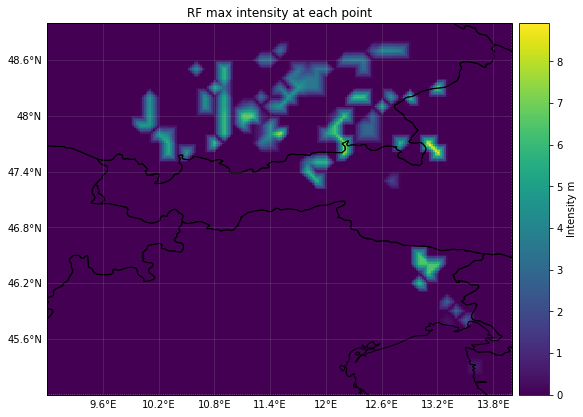

In [6]:
min_lat, max_lat, min_lon, max_lon = 45. , 49., 9., 14.
cent = Centroids()
cent.set_raster_from_pnt_bounds((min_lon, min_lat, max_lon, max_lat), res=0.1)
rf_rast = RiverFlood()
rf_rast.set_from_nc(dph_path=HAZ_DEMO_FLDDPH, frc_path=HAZ_DEMO_FLDFRC,
                    centroids=cent, ISINatIDGrid=False)
rf_rast.plot_intensity(event=0)

## Calculating Flooded Area
The fraction indicates the flooded part of a grid cell. It is possible to calculate the flooded area for each grid cell and for the whole area under consideration 

As ISIMIP simulations currently provide yearly data with the maximum event, event and yearly flooded area are the same.

2019-09-13 10:12:37,130 - climada.util.coordinates - INFO - Reading /home/insauer/Climada/climada_python/data/demo/flddph_WaterGAP2_miroc5_historical_flopros_gev_picontrol_2000_0.1.nc
2019-09-13 10:12:37,167 - climada.util.coordinates - INFO - Reading /home/insauer/Climada/climada_python/data/demo/fldfrc_WaterGAP2_miroc5_historical_flopros_gev_picontrol_2000_0.1.nc


/home/insauer/anaconda3/envs/climada_env/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


2019-09-13 10:12:37,446 - climada.hazard.centroids.centr - INFO - Setting geometry points.
2019-09-13 10:12:37,682 - climada.hazard.centroids.centr - DEBUG - Setting area_pixel 41548 points.
Total flooded area for year 2000 in Germany:
2437074832.0380197 m
Total flooded area at first event in Germany:
2437074832.0380197 m


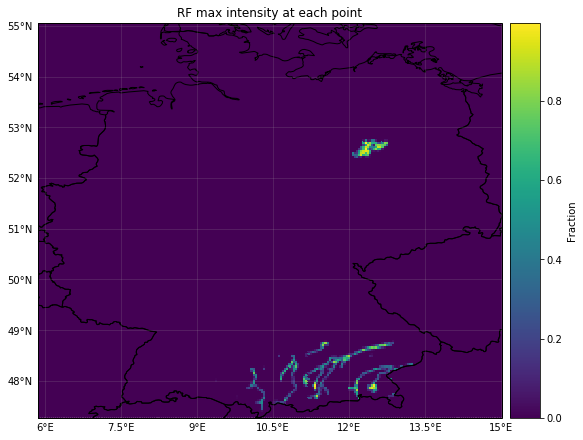

In [7]:
#setting river flood
rf_DEU = RiverFlood()
rf_DEU.set_from_nc(countries = ['DEU'], years=years, dph_path=HAZ_DEMO_FLDDPH, frc_path=HAZ_DEMO_FLDFRC)
rf_DEU.plot_fraction(event=0, smooth = False)
# calculating flooded area
rf_DEU.set_flooded_area()
print("Total flooded area for year " + str(years[0]) + " in Germany:")
print(str(rf_DEU.fla_annual[0]) + " m")

print("Total flooded area at first event in Germany:")
print(str(rf_DEU.fla_event[0]) + " m")


The flooded area in every grid cell for every event or year can also be obtained:

In [8]:
#calculate flooded area
rf_DEU.set_flooded_area(save_centr = True)
print("affected area in each affected centroid and each event:")
rf_DEU.fla_ev_centr.data

2019-09-13 10:12:42,648 - climada.hazard.centroids.centr - INFO - Setting geometry points.
2019-09-13 10:12:42,649 - climada.hazard.centroids.centr - DEBUG - Setting area_pixel 41548 points.
affected area in each affected centroid and each event:


array([  584715.81718072,  5053615.42987189,   584715.81718072,
         772660.21477247,  4635961.19139216,  4844788.31063191,
         877073.72577108,    62648.1284788 ,   793542.93642074,
         710012.09844898,   104512.31458989,  7942935.27615562,
       12980428.99755675,  8862643.59587924, 11015597.79960522,
        8151960.31900815,  8026545.7605029 ,  8110155.46617279,
        3428003.77254628,  2550100.30565756,  5748176.99827292,
       10743865.08816197, 10116791.51695982,   167219.69117698,
         167377.62651458,  2426975.61490712,  7866748.5314332 ,
       12448711.57332617, 10691246.31833798,  3807841.25590698,
         795043.75943462,  9958969.25866094, 10858623.66475107,
       10586635.08712338,  9938046.70065339,  9414992.10340605,
        4100752.0018361 ,    20922.20331432,  4020851.5658597 ,
        8628077.07461064, 12271973.68427272, 11036399.71240725,
        6135986.84213667,  5863741.76936025,  5319251.23373324,
        7936993.24829797, 12104437.71477

# Generating ISIMIP Exposure
The exposed assets are calculated by means of national GDP, downscaled by means of data from population distribution and nighlight intensities on satellite images.

In [9]:
# set exposure for damage calculation
from climada.entity.exposures.gdp_asset import GDP2Asset
from climada.util.constants import DEMO_GDP2ASSET
gdpa = GDP2Asset()
gdpa.set_countries(countries = ['AFG'], ref_year = 2000, path=DEMO_GDP2ASSET)
gdpa

,value,latitude,longitude,if_RF,region_id
0,2.797093e+04,29.395609,62.437279,2.0,6.0
1,3.306962e+04,29.395609,62.478945,2.0,6.0
2,8.180441e+04,29.395609,62.520612,2.0,6.0
3,2.004132e+04,29.395609,64.103943,2.0,6.0
4,3.097130e+04,29.437276,62.312279,2.0,6.0
5,3.715934e+04,29.437276,62.353946,2.0,6.0
6,3.363978e+04,29.437276,62.395612,2.0,6.0
7,0.000000e+00,29.437276,62.437279,2.0,6.0
8,1.963795e+03,29.437276,62.478945,2.0,6.0
9,2.073433e+04,29.437276,62.520612,2.0,6.0


/home/insauer/anaconda3/envs/climada_env/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


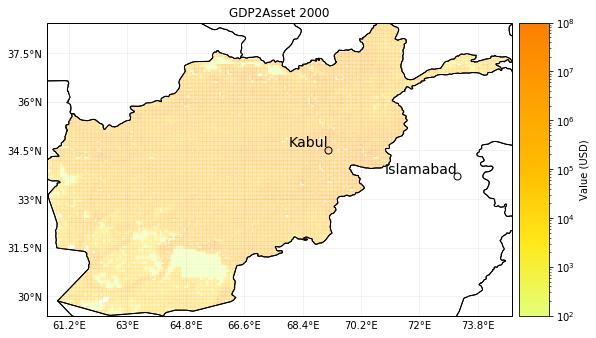

In [10]:
from matplotlib import colors
norm=colors.LogNorm(vmin=1.0e2, vmax=1.0e8)
gdpa.plot_hexbin(norm=norm)


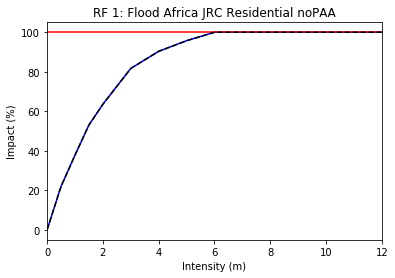

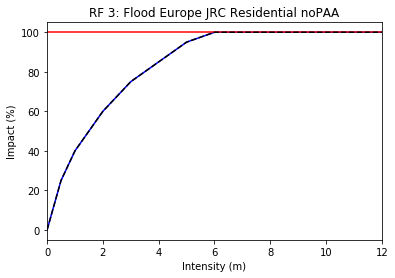

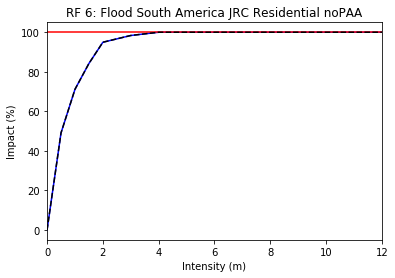

In [14]:
# import impact function set for RiverFlood using JRC damage function for 6 regions
from climada.entity.impact_funcs.flood import IFRiverFlood,flood_imp_func_set
if_set = flood_imp_func_set()
if_AFR = if_set.get_func(fun_id=1)
if_AFR[0].plot()
if_EUR = if_set.get_func(fun_id=3)
if_EUR[0].plot()
if_OCE = if_set.get_func(fun_id=6)
if_OCE[0].plot()